### Outline:
1. Use generated data and classes from **FFNN**
2. Code the back propagation algorithm for our first FF network - single weight and all weights
3. Visualise working of our first FF network
4. Code the back propagation algorithm for a larger FF network
5. Understand the iterative kernel within the back propagation algorithm
6. Exercises

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
import seaborn as sns
import imageio
from IPython.display import HTML

from sklearn.preprocessing import  OneHotEncoder
from sklearn.datasets import make_blobs

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])
# 0 maps to red and 1 maps to green

In [0]:
np.random.seed(0)

# Generate Data

In [0]:
data, labels = make_blobs(n_samples = 1000, centers = 4, n_features = 2, random_state=0)

print(data.shape, labels.shape)

(1000, 2) (1000,)


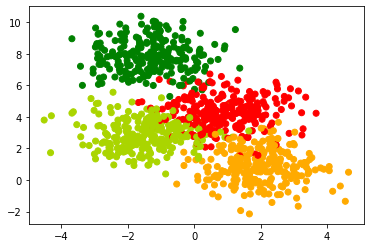

In [0]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap = my_cmap)
plt.show()

### We wanted to do binary classification first, but now we have 4 classes (centers)

Methods:
1. While splitting only split into 2 (in code cell 5)
2. Split the 4 labels into 2 using mod 
3. Can be other ways too

In [0]:
labels_orig = labels 
labels = np.mod(labels_orig,2)

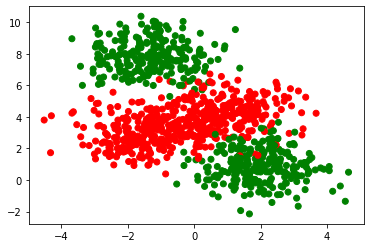

In [0]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap = my_cmap)
plt.show()

In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify = labels, random_state = 0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


# First Feedforward Neural Network

## Backpropagation with single weight update

A simple neural network with 3 neurons. Two inputs, two neurons in one hidden layer, and one neuron in output layer.

This time complete the class (was previously left empty for grad function).

Aim is to do scalar back propagation i.e. without using vectors, updating each parameter (w,b) separately.

I.e. find derivative of loss w.r.t. w1 and update only w1.

Again. only w1 changed this time. None of w2 to w6 or b1 to b3 will be touched. Only visualising how w1 is changed.

In [0]:
class FFNetworkW1:

  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0

  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))

  def forward_pass(self,x):
    self.x1, self.x2 = x; 
    self.a1 = self.w1 * self.x1 + self.w2 * self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3 * self.x1 + self.w4 * self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3

  # What values do we have?
  # The particular input x1 and x2 (as x vector) and the ground truth y
  # First do forward pass to compute a1, h1, a2, h2, a3, h3
  # We also already have weights (even before forward pass) which we initialised randomly
  def grad(self, x, y):
    self.forward_pass(x)

    # Chain rule : 
    # -(y-y') = -(y-h3) .... squared error so derivative of loss w.r.t. predicted output is this
    # y'(1-y') = h3(1-h3) .... derivative of sigmoid function so derivative of activation w.r.t. pre-activation
    # w ... derivative of pre-activation w.r.t. activation of previous layer
    # Again y'(1-y')
    # Finally x1 .... derivative of pre-activation w.r.t. its input (wx+b)
    
    self.dw1 = (self.h3-y)*self.h3*(1-self.h3)*(self.w5)*self.h1*(1-self.h1)*self.x1

  def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise = True, display_loss = True):

    if initialise:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0

    if display_loss:
      loss = {}
      w1 = {}

    for i in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9

      for x,y in zip(X,Y):
        self.grad(x,y)
        # dw1 contains aggregate of partial derivative of loss w.r.t. w1 FOR EACH INPUT
        dw1 += self.dw1


      m = X.shape[1] 

      self.w1 -= learning_rate * dw1 / m

      if(display_loss):
        w1[i] = self.w1 # Change these two lines for prev notebook
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y, Y_pred)


    if display_loss:
      plt.tight_layout()

      plt.subplot(2,1,1)
      # values attribute only for dictionaries
      plt.plot(np.array(list(w1.values())))
      plt.xlabel("Epochs")
      plt.ylabel("w1")

      plt.subplot(2,1,2)
      plt.plot(np.array(list(loss.values())))
      plt.xlabel("Epochs")
      plt.ylabel("Mean Squared Error")
      plt.show()



  def predict(self, X):
    Y_pred = []
    for x in X: 
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)




Note grad has 3 types of values:
1. h3 kind : which we get during the forward pass
2. y kind : which we already get readily as input to function
3. w3 kind : which we have been estimating or learning with our algorithm. In this case w5 hasn't been changed, remains its initial value. But in typical case, we'll be updating that as well.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


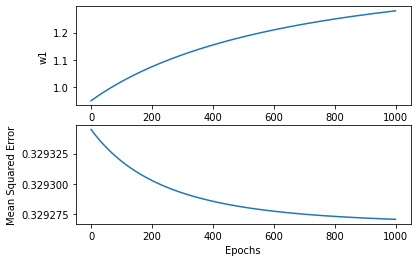

In [0]:
ffnw1 = FFNetworkW1()
ffnw1.fit(X_train, Y_train, epochs = 1000, learning_rate = 0.01, display_loss=True)

Thus,
Loss is continuously decreasing => we are correctly updating weights => we are moving in right direction i.e. gradient descent algorithm is working.  
In many other scenarios we saw that loss was flickering a lot, but here it is constantly decreasing since we are updating "only" one weight. When we update all together, then there we be the unsteady rise and fall of loss.  
The loss saturates at one point "since" the gradient of a vector flowing in the backpropagation channel is becoming 0 after some time. In other words one of the terms in dw1 calculation (nothing bu the gradient formulat) is becoming (or very close to) zero. Thus the saturation.

## Backpropagation with multiple weights update

A simple neural network with 3 neurons. Two inputs, two neurons in one hidden layer, and one neuron in output layer.

Aim is to do scalar back propagation i.e. without using vectors, updating each parameter (w,b) separately.

This time update all weights

In [0]:
class FFNetworkWs:

  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0

  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))

  def forward_pass(self,x):
    self.x1, self.x2 = x; 
    self.a1 = self.w1 * self.x1 + self.w2 * self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3 * self.x1 + self.w4 * self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3

  # Compute grad w.r.t. all (9) parameters
  def grad(self, x, y):
    self.forward_pass(x)

    # Update from back (since you are flowing backwards)

    # Third neuron
    self.dw5 = (self.h3-y)*self.h3*(1-self.h3)*self.h1 # x(input) is h1
    self.dw6 = (self.h3-y)*self.h3*(1-self.h3)*self.h2
    self.db3 = (self.h3-y)*self.h3*(1-self.h3)

    # Second neuron
    self.dw1 = (self.h3-y)*self.h3*(1-self.h3)*(self.w5)*self.h1*(1-self.h1)*self.x1
    self.dw2 = (self.h3-y)*self.h3*(1-self.h3)*(self.w5)*self.h1*(1-self.h1)*self.x2
    self.db1 = (self.h3-y)*self.h3*(1-self.h3)*(self.w5)*self.h1*(1-self.h1)

    # First neuron
    self.dw3 = (self.h3-y)*self.h3*(1-self.h3)*(self.w6)*self.h2*(1-self.h2)*self.x1
    self.dw4 = (self.h3-y)*self.h3*(1-self.h3)*(self.w6)*self.h2*(1-self.h2)*self.x2
    self.db2 = (self.h3-y)*self.h3*(1-self.h3)*(self.w5)*self.h2*(1-self.h2)


  def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise = True, display_loss = True):

    if initialise:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0

    if display_loss:
      loss = {}

    for i in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9

      for x,y in zip(X,Y):
        self.grad(x,y)
        # accumulating values for each input, i.e. appending to the list for each value
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3


      m = X.shape[1] 

      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m

      if(display_loss):
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y, Y_pred)


    if display_loss:
      plt.plot(np.array(list(loss.values())))
      plt.xlabel("Epochs")
      plt.ylabel("Mean Squared Error")
      plt.show()



  def predict(self, X):
    Y_pred = []
    for x in X: 
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)




Just visualise the NN in case of scalar backpropagation to apply the chain rule easily.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


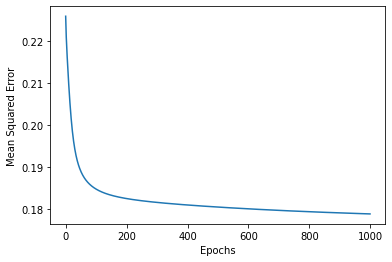

In [0]:
ffnws = FFNetworkWs()
ffnws.fit(X_train, Y_train, epochs = 1000, learning_rate = 0.01, display_loss=True)

Note that now that we are updating all the weights there is rising and falling of loss (not smoothly decreasing).  
**But also note that the loss has significantly decreased (approx 0.02).**

In [0]:
Y_pred_train = ffnws.predict(X_train) # forward pass
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype('int').ravel()

Y_pred_val = ffnws.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype('int').ravel()

accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

# round to two digits
print("Training accuracy", round(accuracy_train,2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.73
Validation accuracy 0.72


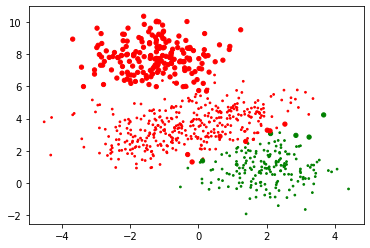

In [0]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap = my_cmap, s = 15*(np.abs(Y_pred_binarised_train-Y_train)+.2))

### Note most points are classified correctly

# Multi class classification

In [0]:
# No more binary classification (which as seen in the graph, had 2 colors only)
X_train, X_val, Y_train, Y_val = train_test_split(data, labels_orig, stratify = labels_orig, random_state = 0)
print(X_train.shape, X_val.shape, labels_orig.shape)

(750, 2) (250, 2) (1000,)


In [0]:
enc = OneHotEncoder()
# label 0 -> (1,0,0,0), label 1 -> (0,1,0,0)
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

(750, 4) (250, 4)


2 inputs and
2 layers:  
Layer 1 - 2 neurons  
Layer 2 (Output layer) - 4 neurons  
Thus softmax activation funtion in last layer  
Cross Entropy Loss   
18 parameters = 
(2*2 + 2*4 = 12 wts) and 6 b's


In [0]:
class FFSN_MultiClass:
  # Using vectors throughout to simplify computations

  def __init__(self): # hidden_sizes, comma separated values of number of neurons in each hidden layer

    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5= np.random.randn()
    self.w6 = np.random.randn()
    self.w7 = np.random.randn()
    self.w8 = np.random.randn()
    self.w9 = np.random.randn()
    self.w10 = np.random.randn()
    self.w11 = np.random.randn()
    self.w12 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
    self.b6 = 0

    
  def sigmoid(self,x):
      return 1.0/(1.0+np.exp(-x))

  def forward_pass(self,x):
      # input layer 
      self.x1, self.x2 = x

      # hidden layer
      self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
      self.h1 = self.sigmoid(self.a1)
      self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
      self.h2 = self.sigmoid(self.a2)

      # output layer
      self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
      self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b3
      self.a5 = self.w9*self.h1 + self.w10*self.h2 + self.b3
      self.a6 = self.w11*self.h1 + self.w12*self.h2 + self.b3

      # Softmax
      sum_exps = np.sum([np.exp(self.a3),np.exp(self.a4),np.exp(self.a5),np.exp(self.a6)])

      self.h3 = np.exp(self.a3)/sum_exps
      self.h4 = np.exp(self.a4)/sum_exps
      self.h5 = np.exp(self.a5)/sum_exps
      self.h6 = np.exp(self.a6)/sum_exps


      # return probability(output) corresponding to each label/class
      return np.array([self.h3,self.h4,self.h5,self.h6])


  def grad(self,x,y):
      self.forward_pass(x)
      # Splittng the actual output (thus getting the "one hot encoding")
      self.y1, self.y2, self.y3, self.y4 = np.array(y)

      # Using self.dw's since they then belong to the class, don't have to return the array of so many parameters (easy way to return)

      # Output layer
      # Chain rule when applied to softmax function so just -(y-y') (not sigmoid unlike binary classification where derivative was y'(1-y'))
      self.dw5 = (self.h3-self.y1)*self.h1 
      self.dw6 = (self.h3-self.y1)*self.h2
      self.db3 = (self.h3-self.y1)

      self.dw7 = (self.h4-self.y2)*self.h1
      self.dw8 = (self.h4-self.y2)*self.h2
      self.db4 = (self.h4-self.y2)

      self.dw9 = (self.h5-self.y3)*self.h1 # x(input) is h1
      self.dw10 = (self.h5-self.y3)*self.h2
      self.db5 = (self.h5-self.y3)

      self.dw11 = (self.h6-self.y4)*self.h1 # x(input) is h1
      self.dw12 = (self.h6-self.y4)*self.h2
      self.db6 = (self.h6-self.y4)

      # First hidden layer
      # This time compute dh1 since h1 depends on many terms (all h3,h4,h5,h6), so apply chain rule to each
      self.dh1 = (self.h3-self.y1)*(self.w5) + (self.h4-self.y2)*(self.w7) + (self.h5-self.y3)*(self.w9) + (self.h6-self.y4)*(self.w11)
      # use dh1 - easier
      self.dw1 = self.dh1*self.h1*(1-self.h1)*self.x1
      self.dw2 = self.dh1*self.h1*(1-self.h1)*self.x2
      self.db1 = self.dh1*self.h1*(1-self.h1)

      self.dh2 = (self.h3-self.y1)*(self.w6) + (self.h4-self.y2)*(self.w8) + (self.h5-self.y3)*(self.w10) + (self.h6-self.y4)*(self.w12)
      self.dw3 = self.dh2*self.h2*(1-self.h2)*self.x1
      self.dw4 = self.dh2*self.h2*(1-self.h2)*self.x2
      self.db2 = self.dh2*self.h2*(1-self.h2)
  

  def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise = True, display_loss = True):

    if display_loss:
      loss = {}

    for i in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, dw11, dw12, db1, db2, db3, db4, db5, db6 = [0]*18

      for x,y in zip(X,Y):
        self.grad(x,y)
        # accumulating values for each input, i.e. appending to the list for each value
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        dw11 += self.dw11
        dw12 += self.dw12
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db4 += self.db4
        db5 += self.db5
        db6 += self.db6



      m = X.shape[1] 

      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.w7 -= learning_rate * dw7 / m
      self.w8 -= learning_rate * dw8 / m
      self.w9 -= learning_rate * dw9 / m
      self.w10 -= learning_rate * dw10 / m
      self.w11 -= learning_rate * dw11 / m
      self.w12 -= learning_rate * dw12 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      self.b4 -= learning_rate * db4 / m
      self.b5 -= learning_rate * db5 / m
      self.b6 -= learning_rate * db6 / m

      if(display_loss):
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y, Y_pred)


    if display_loss:
      plt.plot(np.array(list(loss.values())))
      plt.xlabel("Epochs")
      plt.ylabel("Mean Squared Error")
      plt.show()



    # Finally, predict
  def predict(self, X):
      Y_pred = []
      for x in X: 
        y_pred = self.forward_pass(x) # Predict output on each "pair" of inputs (of the two features)
        Y_pred.append(y_pred)
      return np.array(Y_pred)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:102: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


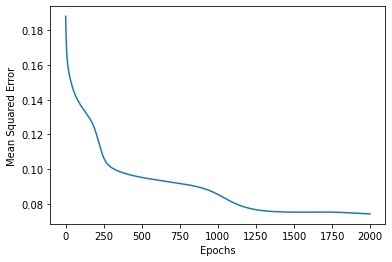

In [0]:
ffsn_multiclass = FFSN_MultiClass()

# Was getting a bad error. Realised had passed Y_train instead of y_OH_train
# Loss significantly reduced on 1000, 0.1 -> 2000, 0.01 . Also note how loss gradually decreases unlike the irregular rise and fall
ffsn_multiclass.fit(X_train, y_OH_train, epochs = 2000, learning_rate = 0.001, display_loss=True)

In [0]:
print(Y_train)

[0 3 3 2 2 0 3 2 0 1 0 3 1 3 1 2 1 0 2 2 2 1 0 2 2 2 0 3 2 1 3 2 3 2 1 2 0
 1 2 2 3 2 1 1 0 3 2 3 3 0 0 2 2 0 0 0 2 3 0 1 0 0 0 1 2 1 0 1 1 0 0 1 0 2
 1 3 2 3 3 2 1 3 2 2 2 3 3 2 2 1 0 1 3 0 1 1 1 2 3 0 1 3 3 0 2 0 0 1 1 1 3
 0 2 2 1 1 1 2 2 3 1 3 0 0 1 3 0 3 1 3 2 2 0 1 3 3 3 0 2 3 2 3 3 0 0 2 0 0
 3 0 3 0 0 3 0 2 0 3 1 0 0 2 0 0 1 3 3 0 0 3 0 3 0 1 2 2 0 1 0 3 2 0 1 1 1
 1 2 1 1 0 0 1 0 2 3 2 3 0 1 3 1 2 1 0 0 3 0 3 3 0 1 3 2 1 3 2 1 3 2 1 1 0
 1 2 3 0 2 2 0 0 0 1 2 0 3 3 1 0 1 2 3 2 2 2 2 3 0 2 1 2 0 2 1 0 3 2 3 3 2
 0 0 3 2 3 2 1 1 0 3 3 1 0 0 3 1 0 2 0 1 3 1 1 1 1 2 1 0 0 1 1 1 2 3 0 0 2
 2 2 0 1 1 3 1 0 3 2 2 2 0 1 2 3 1 0 2 0 1 0 2 2 2 2 1 0 3 3 1 2 1 3 0 1 1
 1 2 0 3 0 0 0 3 1 0 1 1 1 3 2 3 2 2 3 2 1 0 2 3 1 1 3 3 1 2 1 2 3 3 2 0 1
 1 3 2 2 3 1 3 3 1 0 2 2 3 2 2 0 0 0 0 2 3 0 2 3 0 0 2 0 2 0 3 1 3 3 0 2 3
 3 1 1 1 3 2 1 0 3 1 2 1 2 1 0 0 3 3 3 1 1 0 1 1 1 1 3 0 2 2 0 1 1 1 3 0 2
 2 3 1 2 2 2 1 0 3 0 2 2 3 2 2 3 1 3 2 0 2 2 0 2 2 2 1 2 0 1 1 2 0 2 1 2 2
 3 3 0 2 0 2 0 0 1 3 0 1 

In [0]:
print(y_OH_train)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [0]:
Y_pred_train = ffsn_multiclass.predict(X_train) # forward pass
Y_pred_train_value = np.argmax(Y_pred_train,1)

Y_pred_val = ffsn_multiclass.predict(X_val)
Y_pred_val_value = np.argmax(Y_pred_val,1)
                         
accuracy_train = accuracy_score(Y_pred_train_value, Y_train)
accuracy_val = accuracy_score(Y_pred_val_value, Y_val)

# round to two digits
print("Training accuracy", round(accuracy_train,2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.76
Validation accuracy 0.74


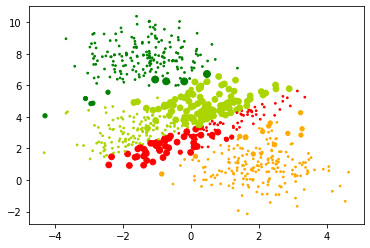

In [0]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train_value, cmap = my_cmap, s = 15*(np.abs(Y_pred_train_value-Y_train)+.2))